In [4]:
import pandas as pd 

#https://actu.fr/ile-de-france/paris_75056/securite-routiere-les-accidents-mortels-en-hausse-a-paris-et-en-ile-de-france_52082008.html
#La région parisienne est de loin la plus concernée. en 2020 1532 accidents de vélo ont fait au moins un blessé léger à Paris (15 fev 2021)


#df = pd.read_csv("./df_acc_agg_paris.csv", low_memory=False)
df = pd.read_csv("./df_acc_agg.csv", low_memory=False)

"""
Num_Acc ID accident
an, mois, jour, hrmn infos temporelles sur l'accident
agg agglo (1) ou non (2)
adr, lat, long infos sur le lieux de l'accident
dep departement
catv categorie du véhicule
grav gravite de l'accident (1-4), 
catr catégorie route (1-9)
voie, v1, v2 numéro de la route et indices numériques, alphanumériques
circ régime de circulation (-1-4)
nbv nombre voies circulations,
vosp signale existence voie réservée (-1-3)
prof profil route à l'endroit de l'accident
plan tracé en plan
larrout largeur de la route (en m)
surf etat de la surface (-1-9)
infra aménagement (-1-9)
situ situation sur l'aménagement (-1-8)
""";

In [5]:
bike_df = df[ df['catv'].isin([1, 50, 60, 80]) ]
bike_acc = df[ df['Num_Acc'].isin(bike_df['Num_Acc']) ]


print(bike_acc['Num_Acc'].nunique() / df['Num_Acc'].nunique())

0.07607186705077075


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In year 5: 5064 bike crashes for 87026 total crashes (5.82%)
In year 6: 5015 bike crashes for 82993 total crashes (6.04%)
In year 7: 5165 bike crashes for 83850 total crashes (6.16%)
In year 8: 4847 bike crashes for 76767 total crashes (6.31%)
In year 9: 4902 bike crashes for 74409 total crashes (6.59%)
In year 10: 4405 bike crashes for 69379 total crashes (6.35%)
In year 11: 4732 bike crashes for 66974 total crashes (7.07%)
In year 12: 4360 bike crashes for 62250 total crashes (7.00%)
In year 13: 4194 bike crashes for 58397 total crashes (7.18%)
In year 14: 4565 bike crashes for 59854 total crashes (7.63%)
In year 15: 4598 bike crashes for 58654 total crashes (7.84%)
In year 16: 4558 bike crashes for 59432 total crashes (7.67%)
In year 17: 4682 bike crashes for 60701 total crashes (7.71%)
In year 18: 4789 bike crashes for 57783 total crashes (8.29%)
In year 2019: 5824 bike crashes for 58840 total crashes (9.90%)
In year 2020: 6107 bike crashes for 47744 total crashes (12.79%)
In year 

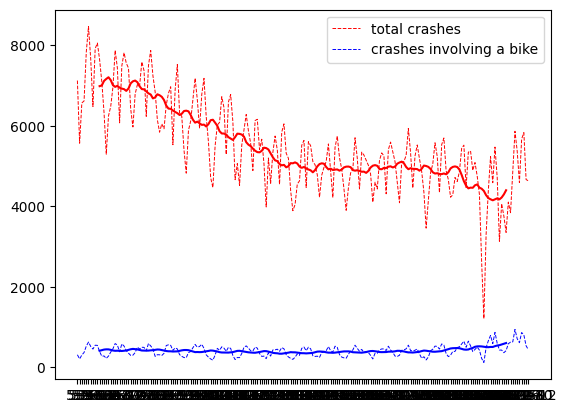

In [7]:
for an in sorted(bike_acc["an"].unique()):
    n_bike_acc = bike_acc[bike_acc['an'] == an]['Num_Acc'].nunique()
    n_acc = df[df['an'] == an]['Num_Acc'].nunique()
    print(f"In year {an}: {n_bike_acc} bike crashes for {n_acc} total crashes ({100. * n_bike_acc / n_acc:.2f}%)")

n_bike_crash = []
n_crash = []
times = []
for an in sorted(bike_acc["an"].unique()):
    for mois in sorted(bike_acc["mois"].unique()):
        n_bike_crash.append(bike_acc[(bike_acc['an'] == an) & (bike_acc['mois'] == mois)]['Num_Acc'].nunique())
        n_crash.append(df[(df['an'] == an) & (df['mois'] == mois)]['Num_Acc'].nunique())
        times.append(f"{an}-{mois}")


kernel_size = 10
n_crash_smooth = [0]*len(n_crash)
n_bike_crash_smooth = [0]*len(n_crash)

for i in range(kernel_size, len(n_crash)-kernel_size):
    n_crash_smooth[i] = np.mean(n_crash[i-kernel_size: i+kernel_size])
    n_bike_crash_smooth[i] = np.mean(n_bike_crash[i-kernel_size: i+kernel_size])
    
plt.plot(times, n_crash, color = "r", linewidth=.7, linestyle="dashed", label = "total crashes")
plt.plot(times[kernel_size: -kernel_size], n_crash_smooth[kernel_size: -kernel_size], color = "r")
plt.plot(times, n_bike_crash, color = "b", linewidth=.7, linestyle="dashed", label = "crashes involving a bike")
plt.plot(times[kernel_size: -kernel_size], n_bike_crash_smooth[kernel_size: -kernel_size], color = "b")
plt.legend()
plt.show()


On observe que le nombre d'accidents corporels a tendance à diminuer ces dernières années, contrairement au nombre d'accidents corporels impliquant au moins un vélo, et ceci est encore plus marquant si on se restreint à la ville de Paris (voir ci-dessous).

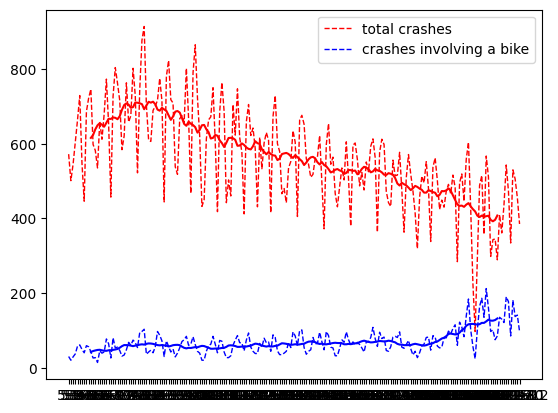

In [5]:
from IPython import display
display.Image("./crashes_paris.png")

In [8]:
import seaborn as sns

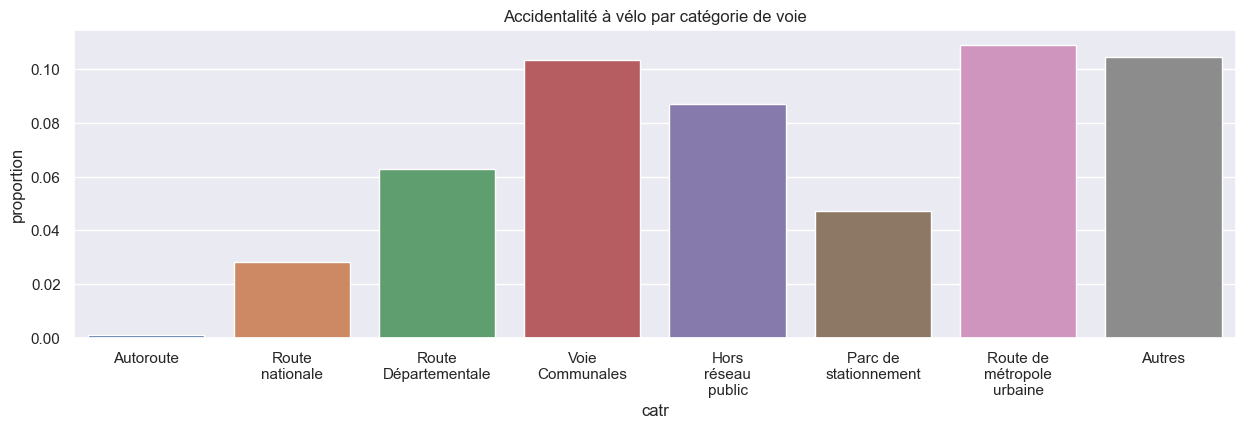

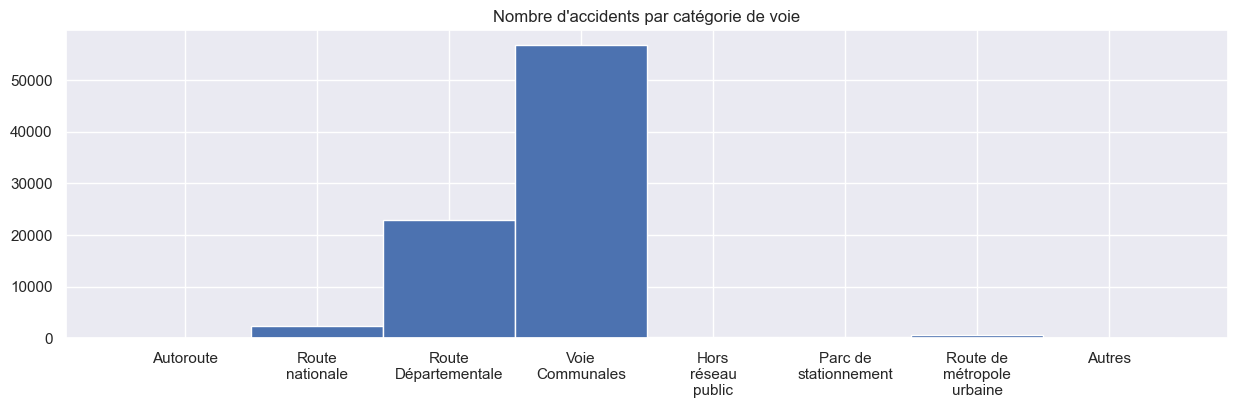

In [14]:
catr_bike = bike_acc.groupby(['catr'])['Num_Acc'].nunique()
catr_all = df.groupby(['catr'])['Num_Acc'].nunique()

catr_stacked = catr_bike.reset_index().merge(catr_all.reset_index(),how='inner',on='catr')
catr_stacked['proportion']=catr_stacked['Num_Acc_x']/catr_stacked['Num_Acc_y']

labels_catr = ["Autoroute", "Route\nnationale", "Route\nDépartementale", "Voie\nCommunales", "Hors\nréseau\npublic", "Parc de\nstationnement", "Route de\nmétropole\nurbaine", "Autres"]
sns.set(rc={'figure.figsize':(15,4)})
plot = sns.barplot(x="catr", y="proportion",data=catr_stacked, linewidth=1)
plot.set_xticklabels(labels_catr)
plot.set(title ="Accidentalité à vélo par catégorie de voie") 


catr_plot = bike_acc.groupby(['catr'])['Num_Acc'].nunique()
fig, ax = plt.subplots()
ax.hist(catr_plot.keys(), bins=[x - .5 for x in range(1, len(catr_plot)+2)], weights = catr_plot)
ax.set_xticks(np.arange(1, len(catr_plot)+1), labels=labels_catr)
plt.title("Nombre d'accidents par catégorie de voie")
plt.show()


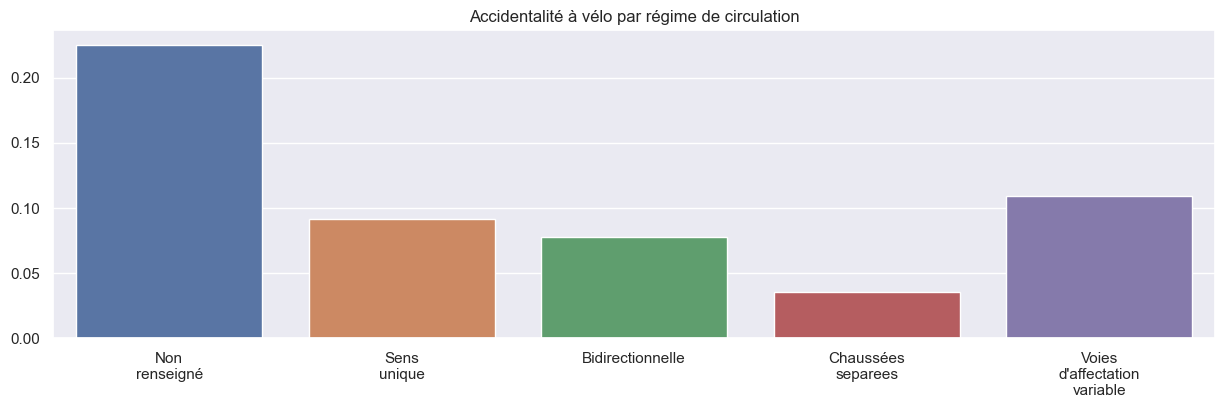

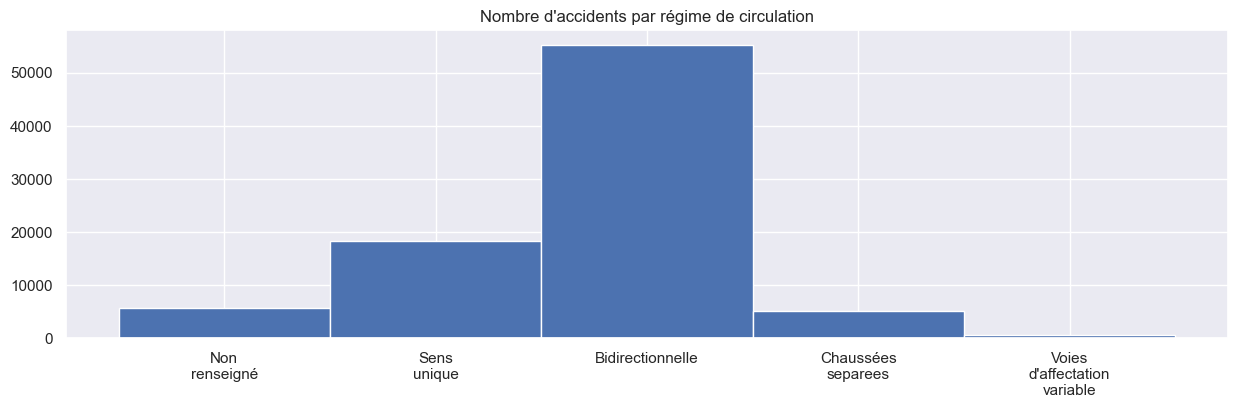

In [26]:
labels_circ = ["Non\nrenseigné", "Sens\nunique", "Bidirectionnelle", "Chaussées\nseparees", "Voies\nd'affectation\nvariable"]
circ_bike = bike_acc.groupby(['circ'])['Num_Acc'].nunique()
circ_all = df.groupby(['circ'])['Num_Acc'].nunique()

circ_stacked = circ_bike.reset_index().merge(circ_all.reset_index(),how='inner',on='circ')
circ_stacked['proportion']=circ_stacked['Num_Acc_x']/circ_stacked['Num_Acc_y']
circ_stacked = circ_stacked["proportion"].tolist()
circ_stacked = [circ_stacked[0] + circ_stacked[1]] + circ_stacked[2:]

data_stacked = {"labels": labels_circ, "values": circ_stacked}

sns.set(rc={'figure.figsize':(15,4)})
plot = sns.barplot(x="labels", y="values", data=data_stacked, linewidth=1)
plot.set(title ="Accidentalité à vélo par régime de circulation") 

circ_plot = bike_acc.groupby(['circ'])['Num_Acc'].nunique()
#Je ne sais pas pourquoi mais il y a une catégorie 0 qui n'est pas dans la doc, je la compte donc comme non renseignée aussi
circ_plot = circ_plot.tolist()
circ_plot = [circ_plot[0] + circ_plot[1]] + circ_plot[2:]
fig, ax = plt.subplots()
ax.hist(np.arange(0, 5), bins=[x - .5 for x in range(0, 6)], weights = circ_plot)
ax.set_xticks(np.arange(0, 5), labels=labels_circ)
plt.title("Nombre d'accidents par régime de circulation")
plt.show()

Ici, on voit que les accidents ont beaucoup plus lieu sur des voies à double sens qu'à sens unique, pourtant les aménagements cyclables à double sens en France représentent seulement 2,3% de la longueur totale des voies (~50 000km contre ~1200km).
Cette information est à contraster avec le plot suivant

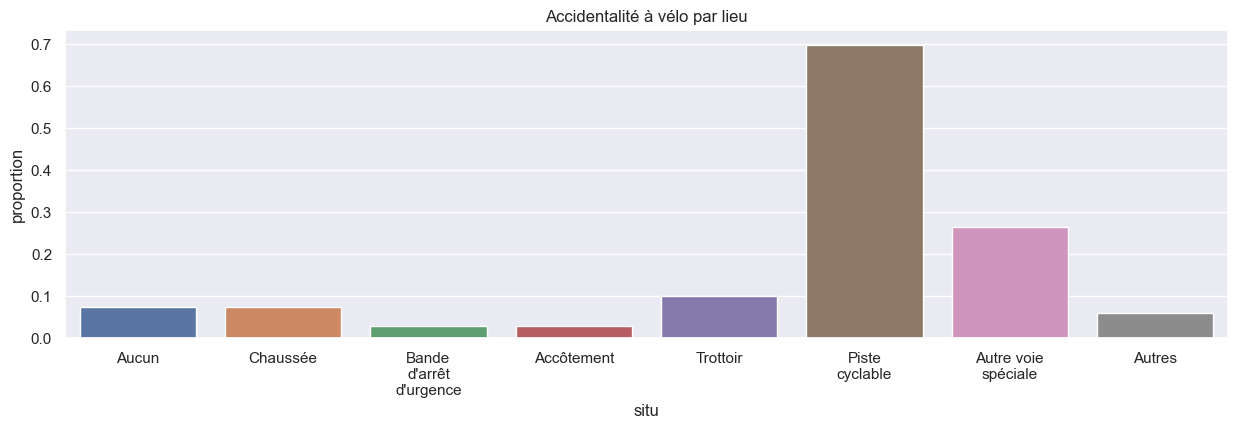

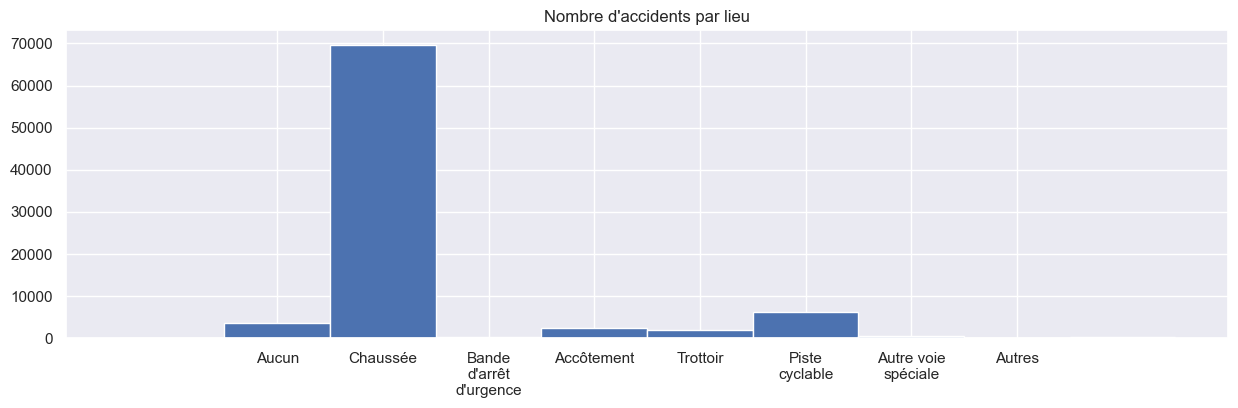

In [32]:
labels_situ = ["Aucun", "Chaussée", "Bande\nd'arrêt\nd'urgence", "Accôtement", "Trottoir", "Piste\ncyclable", "Autre voie\nspéciale", "Autres"]

situ_bike = bike_acc.groupby(['situ'])['Num_Acc'].nunique()
situ_all = df.groupby(['situ'])['Num_Acc'].nunique()

situ_stacked = situ_bike.reset_index().merge(situ_all.reset_index(),how='inner',on='situ')
situ_stacked['proportion']=situ_stacked['Num_Acc_x']/situ_stacked['Num_Acc_y']

sns.set(rc={'figure.figsize':(15,4)})
plot = sns.barplot(x="situ", y="proportion",data=situ_stacked.iloc[1:], linewidth=1)
plot.set_xticklabels(labels_situ)
plot.set(title ="Accidentalité à vélo par lieu") 

situ_plot = bike_acc.groupby(['situ'])['Num_Acc'].nunique()
fig, ax = plt.subplots()
ax.hist(situ_plot.keys(), bins=[x - .5 for x in range(-1, 10)], weights = situ_plot)
ax.set_xticks(np.arange(0, 8), labels=labels_situ)
plt.title("Nombre d'accidents par lieu")
plt.show()

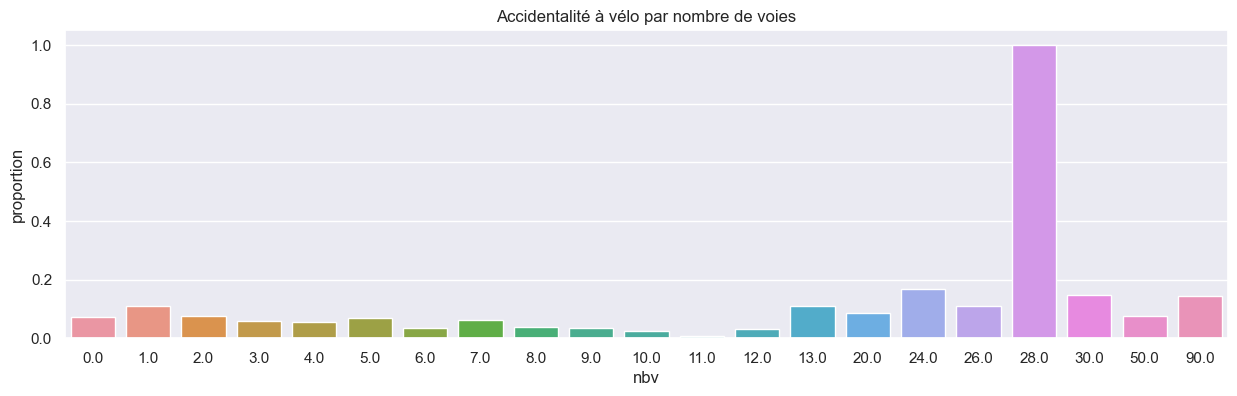

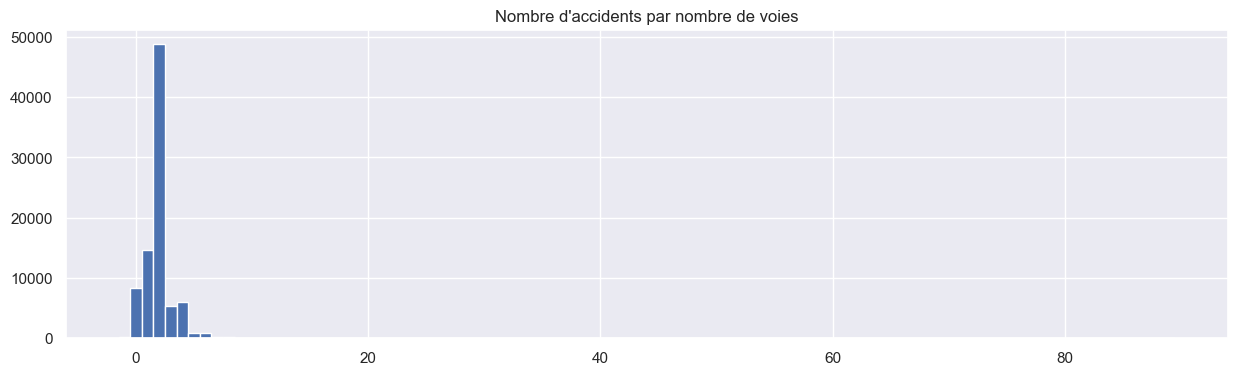

In [35]:
nbv_bike = bike_acc.groupby(['nbv'])['Num_Acc'].nunique()
nbv_all = df.groupby(['nbv'])['Num_Acc'].nunique()

nbv_stacked = nbv_bike.reset_index().merge(nbv_all.reset_index(),how='inner',on='nbv')
nbv_stacked['proportion']=nbv_stacked['Num_Acc_x']/nbv_stacked['Num_Acc_y']

sns.set(rc={'figure.figsize':(15,4)})
plot = sns.barplot(x="nbv", y="proportion",data=nbv_stacked.iloc[1:], linewidth=1)
plot.set(title ="Accidentalité à vélo par nombre de voies") 

nbv_plot = bike_acc.groupby(['nbv'])['Num_Acc'].nunique()
fig, ax = plt.subplots()
ax.hist(nbv_plot.keys(), bins=[x - .5 for x in nbv_plot.keys()], weights = nbv_plot)
plt.title("Nombre d'accidents par nombre de voies")
plt.show()

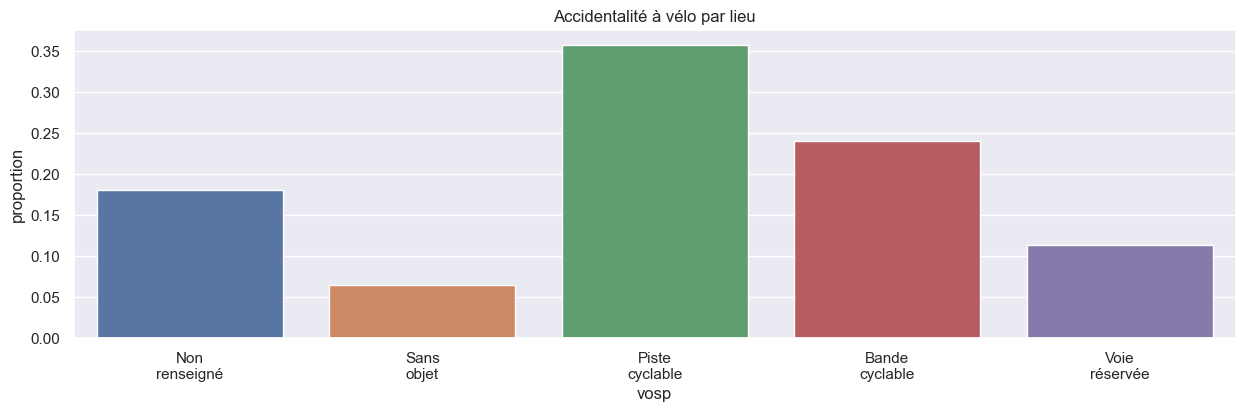

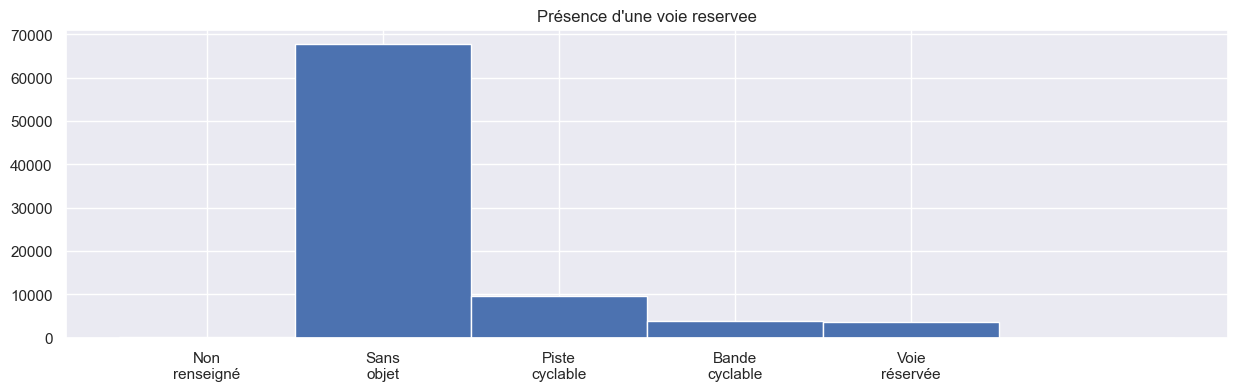

In [40]:
labels_vosp = ["Non\nrenseigné", "Sans\nobjet", "Piste\ncyclable", "Bande\ncyclable", "Voie\nréservée"]

vosp_bike = bike_acc.groupby(['vosp'])['Num_Acc'].nunique()
vosp_all = df.groupby(['vosp'])['Num_Acc'].nunique()

vosp_stacked = vosp_bike.reset_index().merge(vosp_all.reset_index(),how='inner',on='vosp')
vosp_stacked['proportion']=vosp_stacked['Num_Acc_x']/vosp_stacked['Num_Acc_y']

sns.set(rc={'figure.figsize':(15,4)})
plot = sns.barplot(x="vosp", y="proportion",data=vosp_stacked, linewidth=1)
plot.set_xticklabels(labels_vosp)
plot.set(title ="Accidentalité à vélo par lieu") 

vosp_plot = bike_acc.groupby(['vosp'])['Num_Acc'].nunique()
fig, ax = plt.subplots()
ax.hist(vosp_plot.keys(), bins=[x - .5 for x in range(-1, 6)], weights = vosp_plot)
ax.set_xticks(np.arange(-1, 4), labels=labels_vosp)
plt.title("Présence d'une voie reservee")
plt.show()

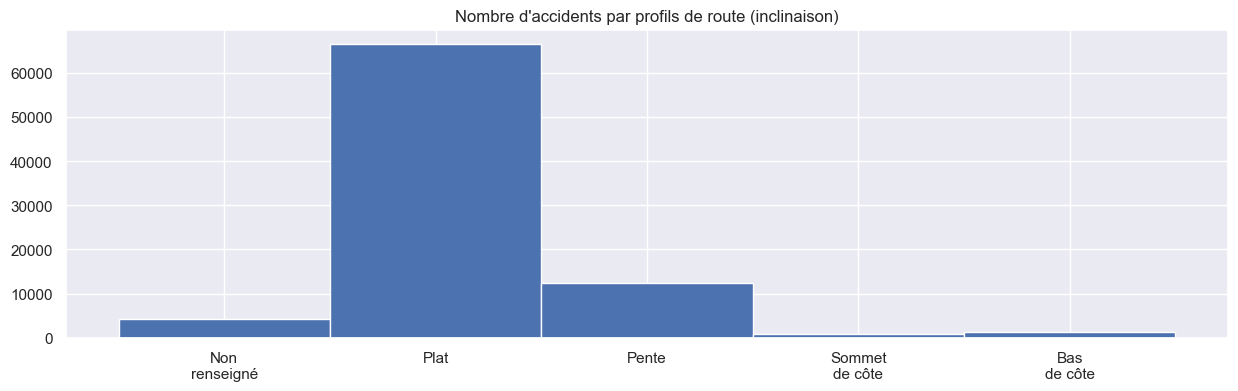

In [42]:
labels_prof = ["Non\nrenseigné", "Plat", "Pente", "Sommet\nde côte", "Bas\nde côte"]
prof_plot = bike_acc.groupby(['prof'])['Num_Acc'].nunique()
fig, ax = plt.subplots()
ax.hist(prof_plot.keys(), bins=[x - .5 for x in range(0, 6)], weights = prof_plot)
ax.set_xticks(np.arange(0, 5), labels=labels_prof)
plt.title("Nombre d'accidents par profils de route (inclinaison)")
plt.show()

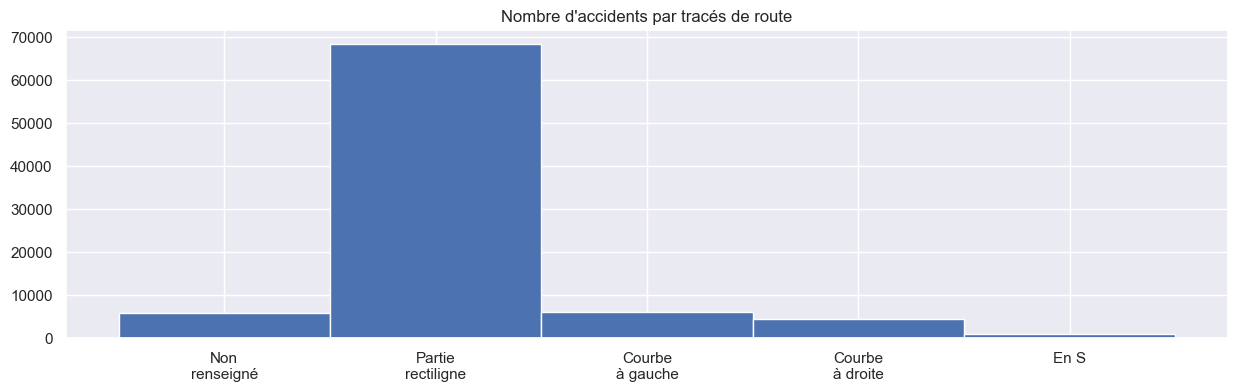

In [44]:
plan_plot = bike_acc.groupby(['plan'])['Num_Acc'].nunique()
labels_plan = ["Non\nrenseigné", "Partie\nrectiligne", "Courbe\nà gauche", "Courbe\nà droite", "En S"]
fig, ax = plt.subplots()
ax.hist(plan_plot.keys(), bins=[x - .5 for x in range(0, 6)], weights = plan_plot)
ax.set_xticks(np.arange(0, 5), labels=labels_plan)
plt.title("Nombre d'accidents par tracés de route")
plt.show()

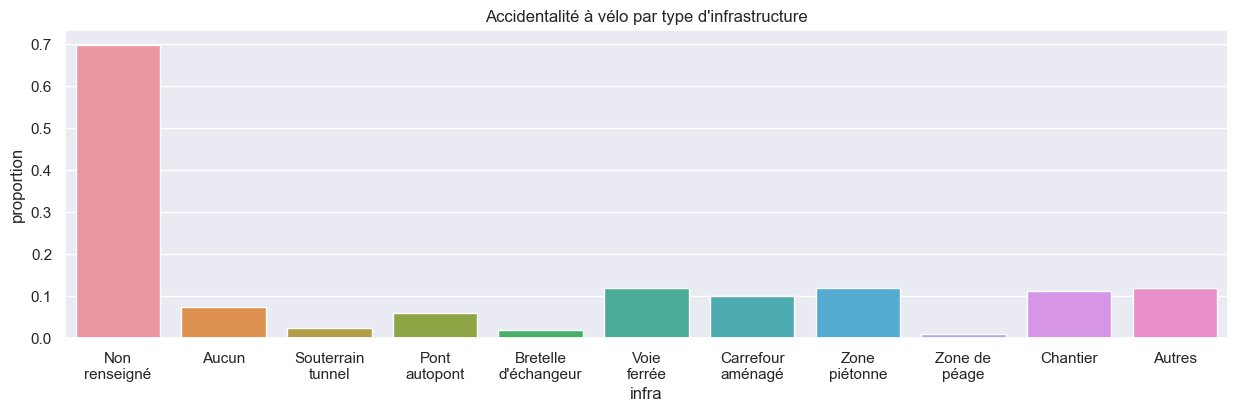

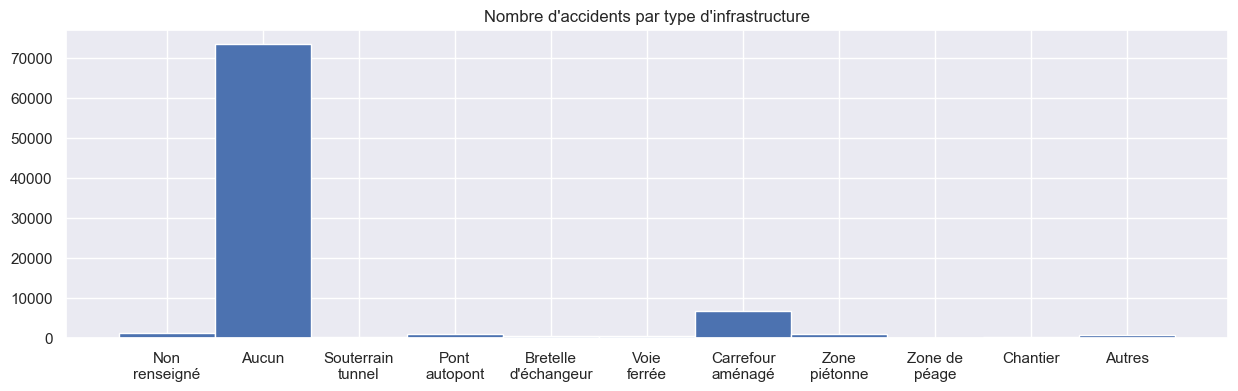

In [47]:
labels_infra = ["Non\nrenseigné", "Aucun", "Souterrain\ntunnel", "Pont\nautopont", "Bretelle\nd'échangeur", "Voie\nferrée", "Carrefour\naménagé", "Zone\npiétonne", "Zone de\npéage", "Chantier", "Autres"]

infra_bike = bike_acc.groupby(['infra'])['Num_Acc'].nunique()
infra_all = df.groupby(['infra'])['Num_Acc'].nunique()

infra_stacked = infra_bike.reset_index().merge(infra_all.reset_index(),how='inner',on='infra')
infra_stacked['proportion']=infra_stacked['Num_Acc_x']/infra_stacked['Num_Acc_y']

sns.set(rc={'figure.figsize':(15,4)})
plot = sns.barplot(x="infra", y="proportion",data=infra_stacked, linewidth=1)
plot.set_xticklabels(labels_infra)
plot.set(title ="Accidentalité à vélo par type d'infrastructure") 

infra_plot = bike_acc.groupby(['infra'])['Num_Acc'].nunique()
fig, ax = plt.subplots()
ax.hist(infra_plot.keys(), bins=[x - .5 for x in range(-1, 11)], weights = infra_plot)
ax.set_xticks(np.arange(-1, 10), labels=labels_infra)
plt.title("Nombre d'accidents par type d'infrastructure")
plt.show()